# Relationship between susceptibility and self-demagnetization

### Import the required modules

In [19]:
%matplotlib inline
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import get_cmap
from fatiando import mesher, utils
from fatiando.gravmag import triaxial_ellipsoid

In [20]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Randomly generated models

In [21]:
# isostropic susceptibility (in SI)
k = np.linspace(0., 1., 50)

In [22]:
demagnetization_measure = []

N = 100

ratio = []

for i in range(N):

    # Ellipsoid semi-axes (in m)
    a = 1000*np.random.rand()
    b = a*np.random.rand()
    c = b*np.random.rand()
    ratio.append((a - b)/(b - c))

    # demagnetizing factors
    n11, n22, n33 = triaxial_ellipsoid.demag_factors(a, b, c)
    
    demagnetization_measure.append(1./(1. - k*n11) + 1./(1. - k*n22) + 1./(1. - k*n33) - 3.)

In [23]:
ratio = np.array(ratio)
ratio_norm = (ratio.max() - ratio)/(ratio - ratio.min() - 1e-10)

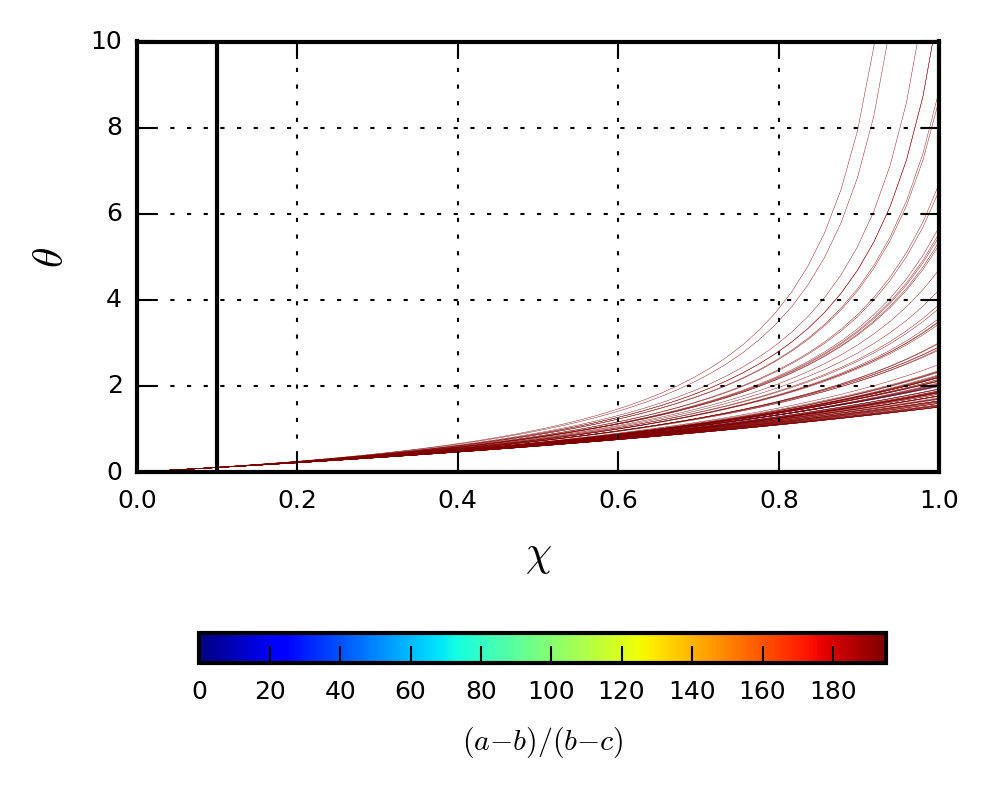

In [24]:
fig = plt.figure(figsize=(3.27, 2))

# Set the line colors
colors = get_cmap('jet')

for d, rn in zip(demagnetization_measure, ratio_norm):
    plt.plot(k, d, '-k', linewidth=0.1, color=colors(rn))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 10.)
plt.grid()

norm = Normalize(vmin = ratio.min(), vmax = ratio.max())
ax = fig.add_axes([0.2, -0.1, 0.7, 0.05], adjustable='datalim')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'horizontal')
cb.set_label('$(a - b)/(b - c)$')

plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\susceptibility.pdf', facecolor='w', bbox_inches='tight')
plt.show()